# Sentiment Analysis


this version below works fine but I added chekpointing and retries to the code in the last cell

In [11]:
>>> import nltk
>>> nltk.download('punkt_tab')
>>> nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pooya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooya\AppData\Roaming\nltk_data...


True

copy the source file to the root folder to be read and make sure the name is right

Identified Topics:
Topic 1:
problem kind solved thank enel mr thanks operator oscar professionalism

Topic 2:
shop rom saronno slow bravetta shame site rome impossible italian

Topic 3:
service operator day enel time customer problem terrible rude phone

Topic 4:
kind helpful enel great went professional excellent friendly space operator

Topic 5:
gas enel euro contract price year change pay month rate



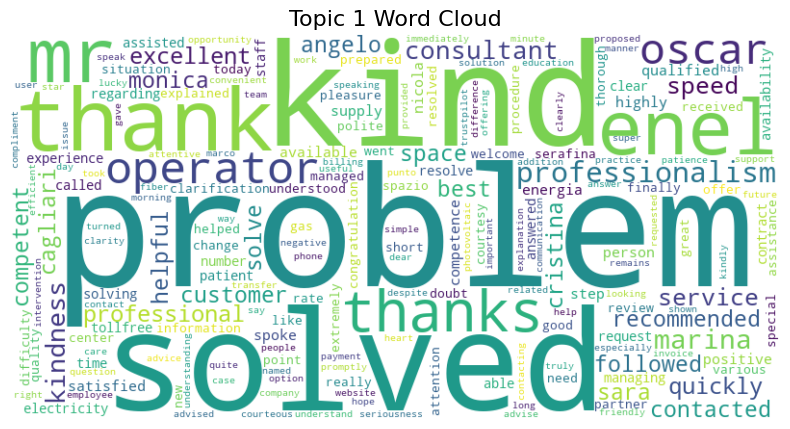

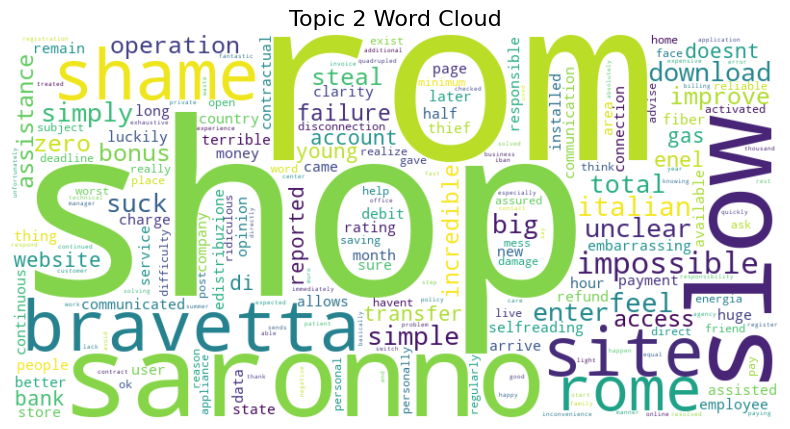

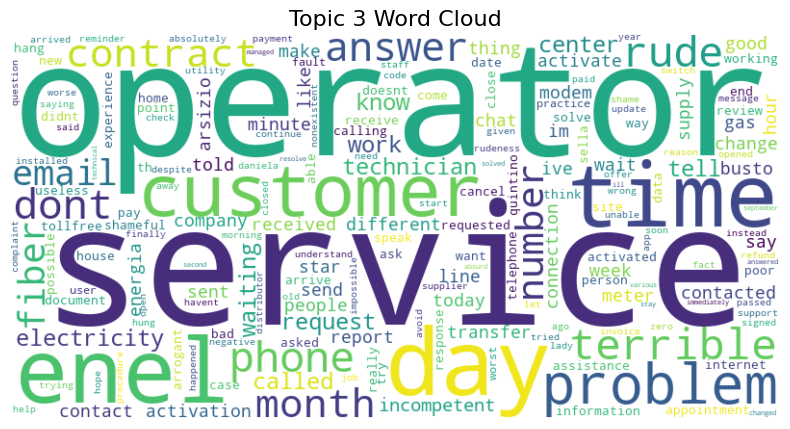

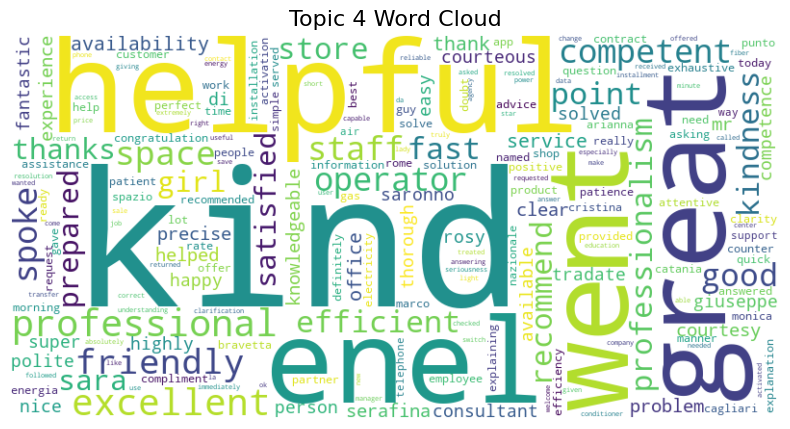

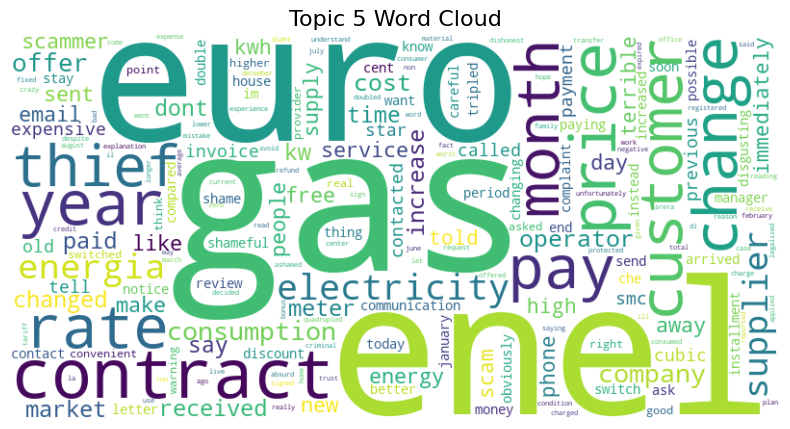

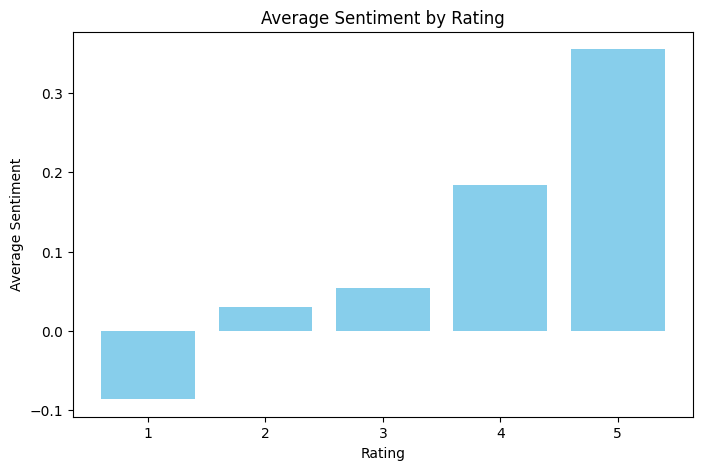

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from langdetect import detect
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
data = pd.read_csv('Enel_reviews.csv')

# Replace N/A values and handle missing data
data['Content'] = data['Content'].replace('N/A', np.nan)
data['Text'] = data['Content'].fillna(data['Title'])  # Use Title if Content is missing
data = data.dropna(subset=['Text'])  # Drop rows where both Content and Title are missing

# Language detection and translation
def detect_and_translate(text, target_lang='en'):
    try:
        detected_lang = detect(text)
        if detected_lang != target_lang:
            return GoogleTranslator(source=detected_lang, target=target_lang).translate(text)
        return text
    except Exception as e:
        return np.nan  # Return NaN if language detection/translation fails

# Translate all text to English
data['Translated_Text'] = data['Text'].apply(detect_and_translate)
data = data.dropna(subset=['Translated_Text'])  # Drop rows where translation failed

# Text preprocessing
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
data['Cleaned_Text'] = data['Translated_Text'].apply(preprocess_text)

# Sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['Sentiment'] = data['Cleaned_Text'].apply(analyze_sentiment)

# Vectorize text for topic modeling
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
text_matrix = vectorizer.fit_transform(data['Cleaned_Text'])

# Topic modeling with LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for more topics
lda.fit(text_matrix)

# Extract and display topics
feature_names = vectorizer.get_feature_names_out()
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

print("Identified Topics:")
display_topics(lda, feature_names, 10)

# Visualize topics using WordCloud
def plot_wordcloud(lda_model, feature_names, topic_idx):
    topic_words = {feature_names[i]: lda_model.components_[topic_idx][i] for i in range(len(feature_names))}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx+1} Word Cloud', fontsize=16)
    plt.show()

# Generate word clouds for all topics
for i in range(lda.n_components):
    plot_wordcloud(lda, feature_names, i)

# Analyze sentiment by rating
data['Rating'] = data['Rating'].astype(int)  # Ensure Rating is an integer
average_sentiment = data.groupby('Rating')['Sentiment'].mean()

# Plot average sentiment by rating
plt.figure(figsize=(8, 5))
plt.bar(average_sentiment.index, average_sentiment.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Rating')
plt.show()

# Save cleaned data for further analysis
data.to_csv('Enel_cleaned_data.csv', index=False)


Sorgenia

Identified Topics:
Topic 1:
great step service experience operator kind contract customer clear positive

Topic 2:
kind operator helpful fast professional clear friendly competent staff good

Topic 3:
simple speed excellent clarity fast clear simplicity support operator information

Topic 4:
perfect sorgenia electricity gas girl contract supplier time customer hope

Topic 5:
kindness professionalism availability courtesy competence operator clarity patience problem thanks



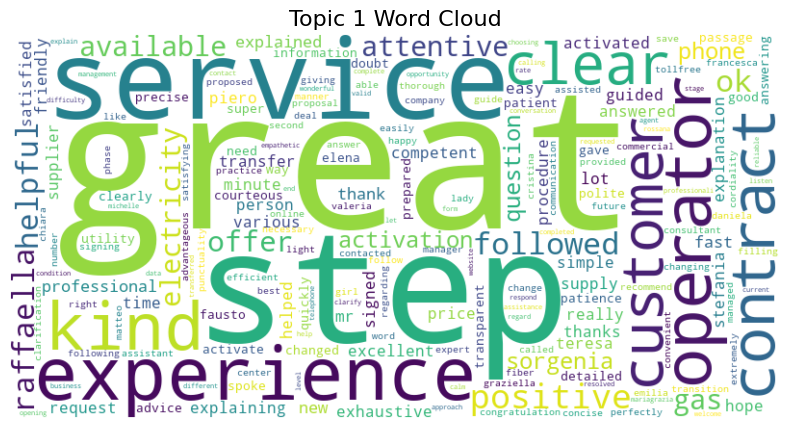

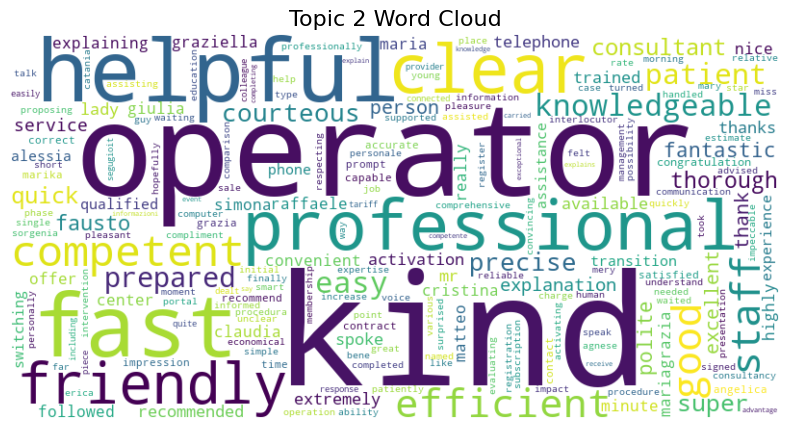

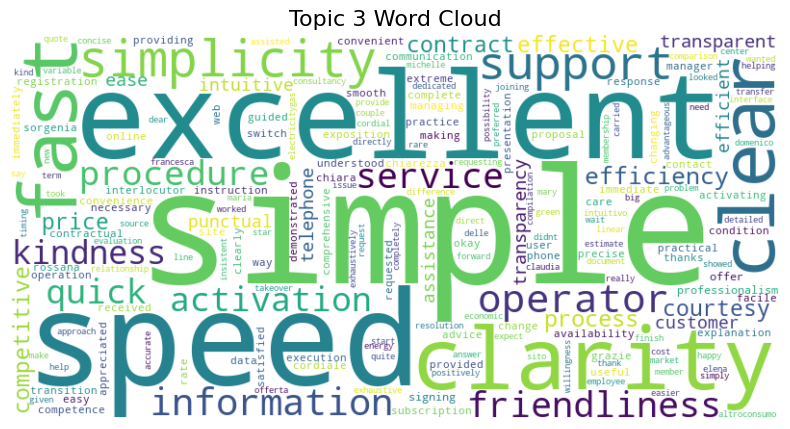

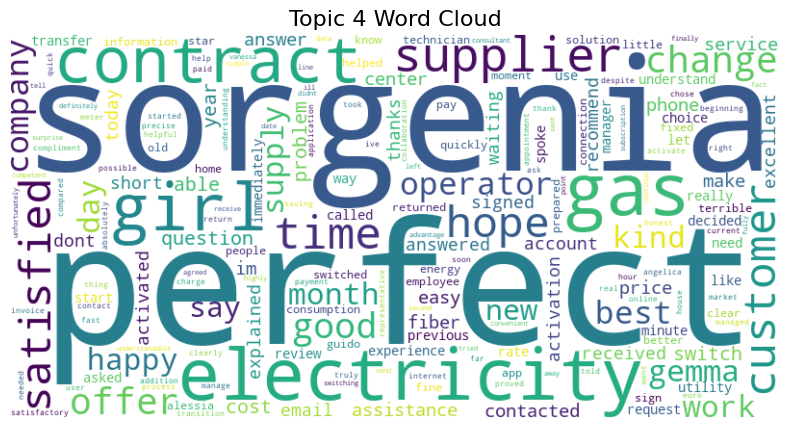

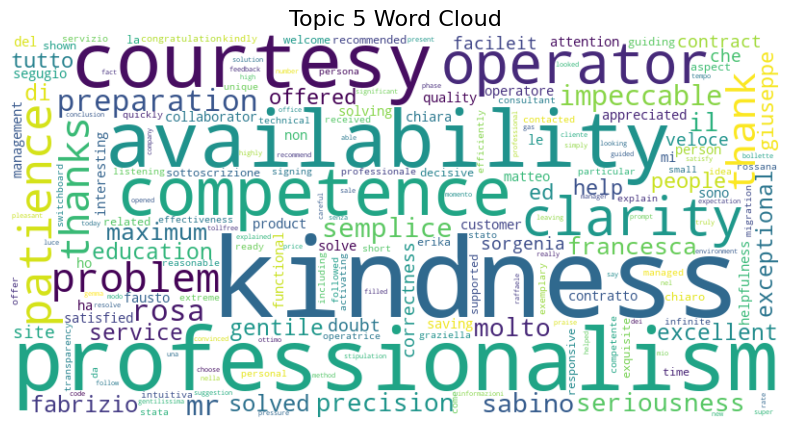

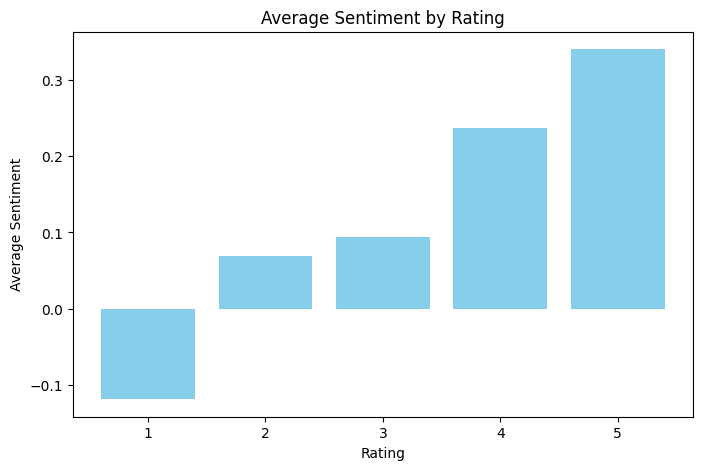

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from langdetect import detect
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
data = pd.read_csv('Sorgenia_reviews.csv')

# Replace N/A values and handle missing data
data['Content'] = data['Content'].replace('N/A', np.nan)
data['Text'] = data['Content'].fillna(data['Title'])  # Use Title if Content is missing
data = data.dropna(subset=['Text'])  # Drop rows where both Content and Title are missing

# Language detection and translation
def detect_and_translate(text, target_lang='en'):
    try:
        detected_lang = detect(text)
        if detected_lang != target_lang:
            return GoogleTranslator(source=detected_lang, target=target_lang).translate(text)
        return text
    except Exception as e:
        return np.nan  # Return NaN if language detection/translation fails

# Translate all text to English
data['Translated_Text'] = data['Text'].apply(detect_and_translate)
data = data.dropna(subset=['Translated_Text'])  # Drop rows where translation failed

# Text preprocessing
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
data['Cleaned_Text'] = data['Translated_Text'].apply(preprocess_text)

# Sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['Sentiment'] = data['Cleaned_Text'].apply(analyze_sentiment)

# Vectorize text for topic modeling
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
text_matrix = vectorizer.fit_transform(data['Cleaned_Text'])

# Topic modeling with LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for more topics
lda.fit(text_matrix)

# Extract and display topics
feature_names = vectorizer.get_feature_names_out()
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

print("Identified Topics:")
display_topics(lda, feature_names, 10)

# Visualize topics using WordCloud
def plot_wordcloud(lda_model, feature_names, topic_idx):
    topic_words = {feature_names[i]: lda_model.components_[topic_idx][i] for i in range(len(feature_names))}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx+1} Word Cloud', fontsize=16)
    plt.show()

# Generate word clouds for all topics
for i in range(lda.n_components):
    plot_wordcloud(lda, feature_names, i)

# Analyze sentiment by rating
data['Rating'] = data['Rating'].astype(int)  # Ensure Rating is an integer
average_sentiment = data.groupby('Rating')['Sentiment'].mean()

# Plot average sentiment by rating
plt.figure(figsize=(8, 5))
plt.bar(average_sentiment.index, average_sentiment.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Rating')
plt.show()

# Save cleaned data for further analysis
data.to_csv('Sorgenia_cleaned_data.csv', index=False)


Octopus

Identified Topics:
Topic 1:
octopus rate customer change contract month service offer energy supplier

Topic 2:
kind fast service helpful efficient customer quick excellent operator friendly

Topic 3:
speed kindness availability professionalism courtesy response thank clarity problem thanks

Topic 4:
great company clear customer service energy initiative transparent price excellent

Topic 5:
question answered kind quickly answer information service request asked fantastic



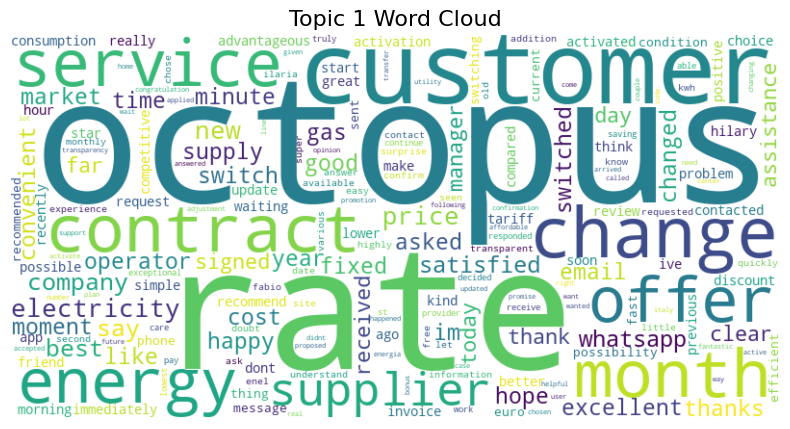

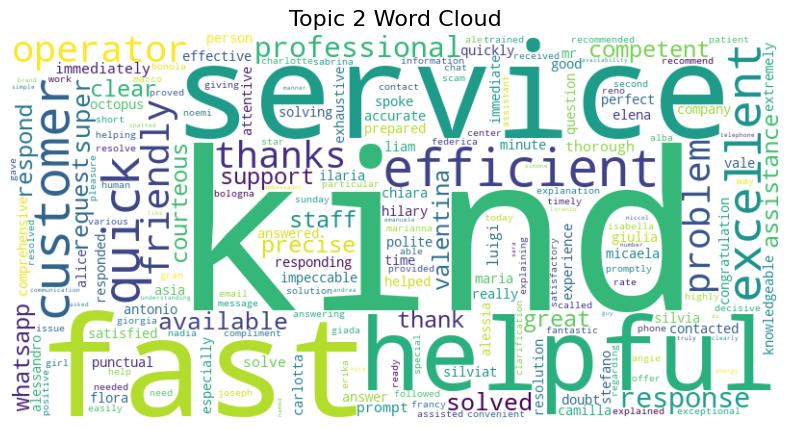

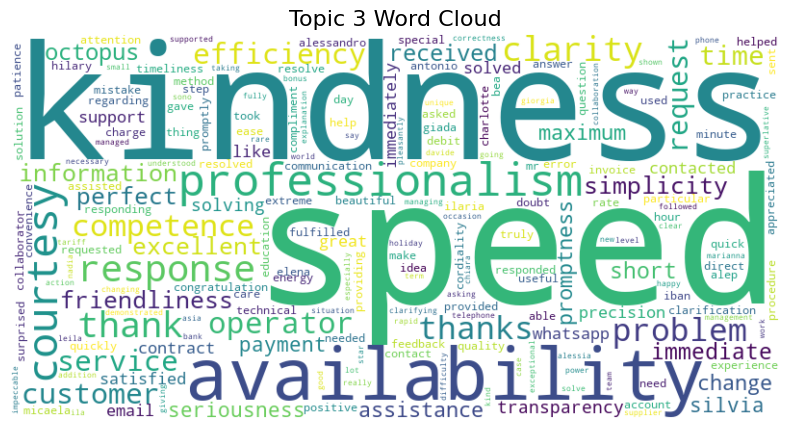

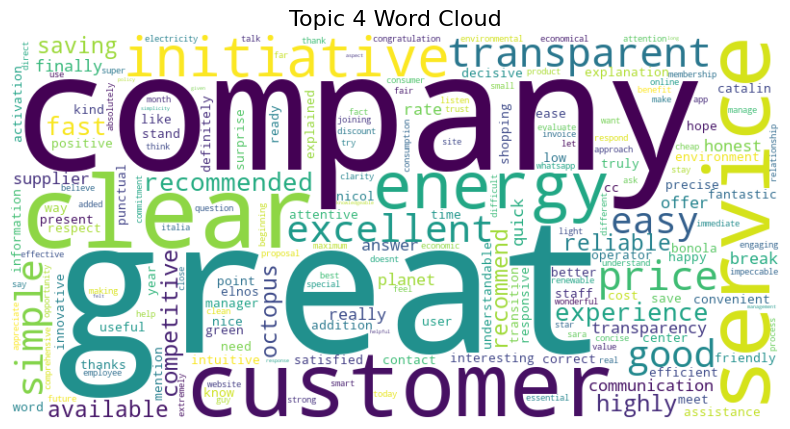

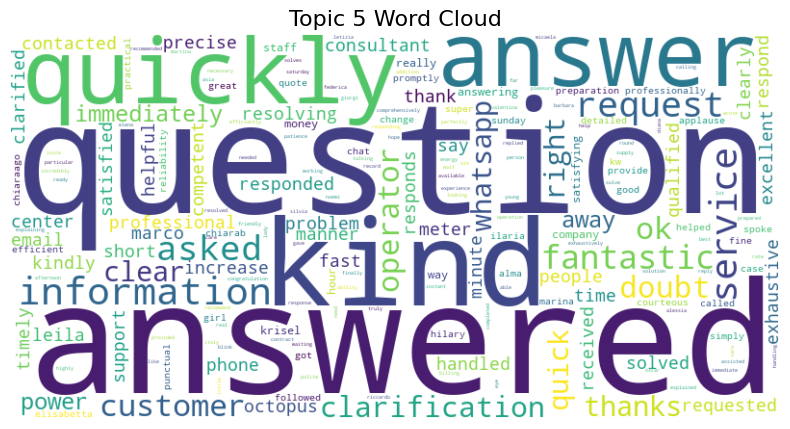

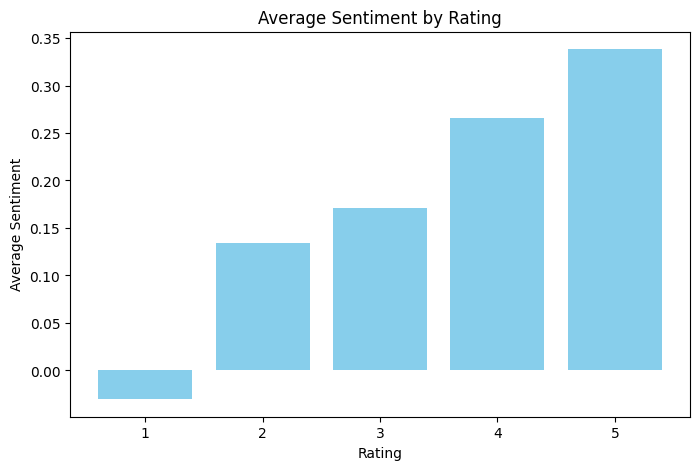

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from langdetect import detect
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
data = pd.read_csv('Octopus_reviews.csv')

# Replace N/A values and handle missing data
data['Content'] = data['Content'].replace('N/A', np.nan)
data['Text'] = data['Content'].fillna(data['Title'])  # Use Title if Content is missing
data = data.dropna(subset=['Text'])  # Drop rows where both Content and Title are missing

# Language detection and translation
def detect_and_translate(text, target_lang='en'):
    try:
        detected_lang = detect(text)
        if detected_lang != target_lang:
            return GoogleTranslator(source=detected_lang, target=target_lang).translate(text)
        return text
    except Exception as e:
        return np.nan  # Return NaN if language detection/translation fails

# Translate all text to English
data['Translated_Text'] = data['Text'].apply(detect_and_translate)
data = data.dropna(subset=['Translated_Text'])  # Drop rows where translation failed

# Text preprocessing
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
data['Cleaned_Text'] = data['Translated_Text'].apply(preprocess_text)

# Sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['Sentiment'] = data['Cleaned_Text'].apply(analyze_sentiment)

# Vectorize text for topic modeling
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
text_matrix = vectorizer.fit_transform(data['Cleaned_Text'])

# Topic modeling with LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for more topics
lda.fit(text_matrix)

# Extract and display topics
feature_names = vectorizer.get_feature_names_out()
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

print("Identified Topics:")
display_topics(lda, feature_names, 10)

# Visualize topics using WordCloud
def plot_wordcloud(lda_model, feature_names, topic_idx):
    topic_words = {feature_names[i]: lda_model.components_[topic_idx][i] for i in range(len(feature_names))}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx+1} Word Cloud', fontsize=16)
    plt.show()

# Generate word clouds for all topics
for i in range(lda.n_components):
    plot_wordcloud(lda, feature_names, i)

# Analyze sentiment by rating
data['Rating'] = data['Rating'].astype(int)  # Ensure Rating is an integer
average_sentiment = data.groupby('Rating')['Sentiment'].mean()

# Plot average sentiment by rating
plt.figure(figsize=(8, 5))
plt.bar(average_sentiment.index, average_sentiment.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Rating')
plt.show()

# Save cleaned data for further analysis
data.to_csv('Octopus_cleaned_data.csv', index=False)


Added checkpointing and retries. now Analysis for Sorgenia
Customizations has to be done for
1. data source has to be the company that you want ('Sorgenia_reviews.csv')
2. checkpoint_file which has to be of the same company as the source ('processed_Sorgenia_reviews.csv')
3. the output file must be named after the company that you want, otherwise it will overwrite the previous file in the root folder ('Sorgenia_cleaned_data.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from langdetect import detect
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time
import os

# Load the data
data = pd.read_csv('Sorgenia_reviews.csv')

# Replace N/A values and handle missing data
data['Content'] = data['Content'].replace('N/A', np.nan)
data['Text'] = data['Content'].fillna(data['Title'])  # Use Title if Content is missing
data = data.dropna(subset=['Text'])  # Drop rows where both Content and Title are missing

# Checkpointing: Load partially processed data if available
checkpoint_file = 'processed_Sorgenia_reviews.csv'
if os.path.exists(checkpoint_file):
    processed_data = pd.read_csv(checkpoint_file)
    processed_ids = set(processed_data['ID'])  # Replace 'ID' with your unique identifier column
else:
    processed_data = pd.DataFrame()
    processed_ids = set()

# Translate function with retries
def detect_and_translate(text, target_lang='en', retries=3):
    for attempt in range(retries):
        try:
            detected_lang = detect(text)
            if detected_lang != target_lang:
                return GoogleTranslator(source=detected_lang, target=target_lang).translate(text)
            return text
        except Exception as e:
            if attempt < retries - 1:
                time.sleep(2 ** attempt)  # Exponential backoff
            else:
                return np.nan  # Return NaN if retries are exhausted

# Process each row
results = []
for index, row in data.iterrows():
    if row['ID'] in processed_ids:  # Skip already processed rows
        continue
    try:
        translated_text = detect_and_translate(row['Text'])
        if translated_text is not np.nan:
            results.append({'ID': row['ID'], 'Translated_Text': translated_text})
            # Save the checkpoint
            checkpoint = pd.DataFrame(results)
            checkpoint.to_csv(checkpoint_file, index=False, mode='a', header=not os.path.exists(checkpoint_file))
            results = []  # Clear the results buffer
    except Exception as e:
        print(f"Error processing row {index}: {e}")

print("Processing complete. Data saved to:", checkpoint_file)

# Reload processed data for further analysis
data = pd.read_csv(checkpoint_file)

# Text preprocessing
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
data['Cleaned_Text'] = data['Translated_Text'].apply(preprocess_text)

# Sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['Sentiment'] = data['Cleaned_Text'].apply(analyze_sentiment)

# Vectorize text for topic modeling
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
text_matrix = vectorizer.fit_transform(data['Cleaned_Text'])

# Topic modeling with LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for more topics
lda.fit(text_matrix)

# Extract and display topics
feature_names = vectorizer.get_feature_names_out()
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

print("Identified Topics:")
display_topics(lda, feature_names, 10)

# Visualize topics using WordCloud
def plot_wordcloud(lda_model, feature_names, topic_idx):
    topic_words = {feature_names[i]: lda_model.components_[topic_idx][i] for i in range(len(feature_names))}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx+1} Word Cloud', fontsize=16)
    plt.show()

# Generate word clouds for all topics
for i in range(lda.n_components):
    plot_wordcloud(lda, feature_names, i)

# Analyze sentiment by rating
data['Rating'] = data['Rating'].astype(int)  # Ensure Rating is an integer
average_sentiment = data.groupby('Rating')['Sentiment'].mean()

# Plot average sentiment by rating
plt.figure(figsize=(8, 5))
plt.bar(average_sentiment.index, average_sentiment.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Rating')
plt.show()

# Save cleaned data for further analysis
data.to_csv('Sorgenia_cleaned_data.csv', index=False)
